# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

This project uses spam/ham data that was given by the client. The data includes the subject and email message. This project aims to use multiple machine learning models such as recurrent neutral networks, logistic regression, or naive bayes to predict whether an email is spam or ham. The performance measures that will be used is the F1 score and accuracy score. 


# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

The data was provided by the client. 

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [1]:
import os
import pandas as pd

data_directory = 'data'  

#initialize an empty list to store email data
email_data = [] 

for filename in os.listdir(data_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(data_directory, filename)
        
        #read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            
            #split content into subject and message based on the first line as subject
            lines = content.split('\n', 1)  #split at the first newline
            subject = lines[0].strip() if len(lines) > 0 else ''  #first line as subject
            message = lines[1].strip() if len(lines) > 1 else ''  
            
            #determine the label based on whether sp is in the filename
            label = 'spam' if 'sp' in filename.lower() else 'ham'
            
            #append the information as a dictionary to the list
            email_data.append({'Label': label, 'Subject': subject, 'Message': message})

#convert the list of dictionaries into a pandas DataFrame
email_df = pd.DataFrame(email_data)

print(email_df)


    Label                                            Subject  \
0     ham  Subject: wkshp : * early * - e ( = ) uralic in...   
1     ham       Subject: job announcement - academium sinica   
2     ham           Subject: knowledge language bibliography   
3    spam                            Subject: service update   
4     ham                          Subject: job announcement   
..    ...                                                ...   
867  spam                Subject: personal message . . . . .   
868  spam                 Subject: did right email address ?   
869  spam                         Subject: 95 . 8 capital fm   
870   ham                              Subject: avail review   
871  spam  Subject: freshest email - address - ( pro newb...   

                                               Message  
0    organize combination colloquium work seminar p...  
1    job announcement institute history philology ,...  
2    association language awareness knowledge langu...  
3  

In the above, I looped through all the .txt files in my data folder and then I classified them as either spam or ham based on if the file name had "sp" in it. Then, each email's label, subject, and message are stored in a dictionary, and all dictionaries are appended to a list email_data. The list of dictionaries is converted into a Pandas DataFrame which results with three columns "Label", "Subject" and "Message. "  

In [2]:
email_df["Subject"].value_counts()

Subject
Subject:                                                                                                                                   22
Subject: capitalfm . com                                                                                                                    8
Subject: 95 . 8 capital fm                                                                                                                  6
Subject: re : 6 . 249 dick armey 's slip correction                                                                                         4
Subject: hello                                                                                                                              4
                                                                                                                                           ..
Subject: business internet ! !                                                                                                              

In [3]:
total_emails = len(email_df)
print(f'Total emails: {total_emails}')


Total emails: 872


In the above, I can see that there are 872 total spam/ham emails in the dataset. 

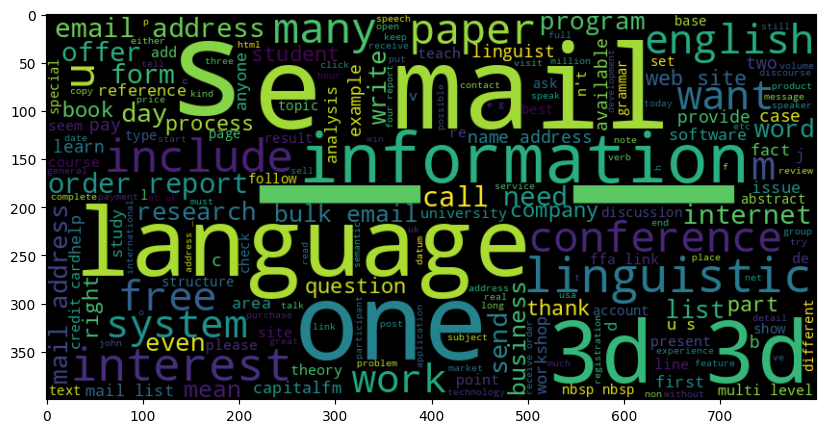

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#combine all the messages into a single text for word cloud generation
all_messages = ' '.join(email_df['Message'].values)

#generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(all_messages)

#display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()



In the above, I can see that the most common words in the whole data set are "s", "3d", "mail", "one", "linguistic", "language", "interest", and "information". 

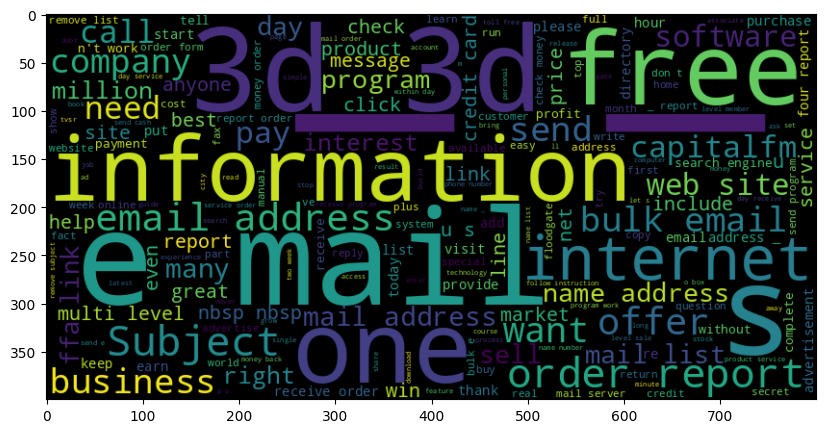

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#filter the dataframe to include only spam messages
spam_data = email_df[email_df['Label'] == 'spam']

#combine the subject and message columns for word cloud generation
all_spam_text = ' '.join(spam_data['Subject'].values) + ' ' + ' '.join(spam_data['Message'].values)

#generate the word cloud for spam messages and subjects
wordcloud = WordCloud(width=800, height=400).generate(all_spam_text)

#display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


In the above, I can see that the words "free", "link", "offer", "sell", "want" are the most common in the messages/subjects of the spam emials. 

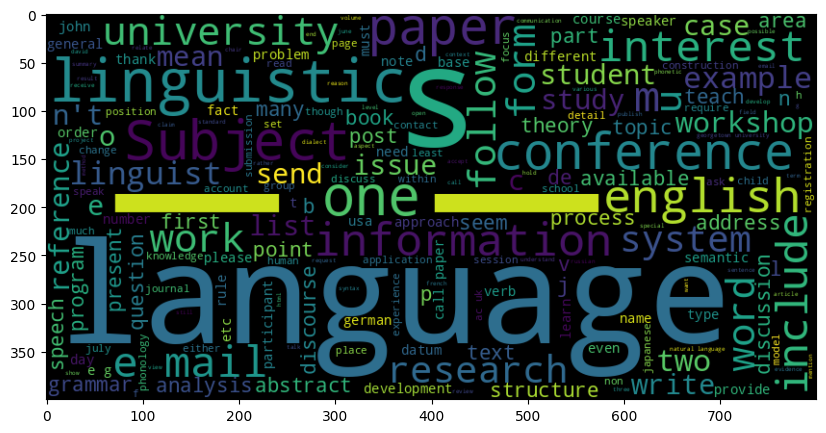

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#filter the dataframe to include only ham messages 
ham_data = email_df[email_df['Label'] == 'ham']

#combine the subject and message columns for word cloud generation
all_ham_text = ' '.join(ham_data['Subject'].values) + ' ' + ' '.join(ham_data['Message'].values)

#generate the word cloud for ham messages and subjects
wordcloud = WordCloud(width=800, height=400).generate(all_ham_text)

#display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


In the above, I can see that the words "linguistic", "language", "one", "conference", "paper", "subject" are common in the messages/subjects of the ham emails. I can also see that there are no words such as "free" in the ham emails. However, I noticed that there are similar words in the spam and ham emails that occur a good amount such as "information". This indicates that that the data processing, I need to remove the common words that exist in both the ham and spam emails. 

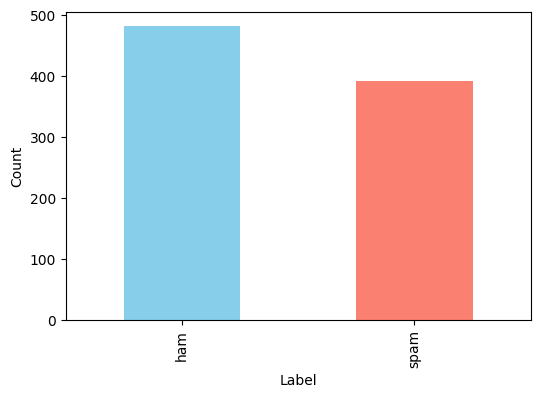

In [7]:
import matplotlib.pyplot as plt

#count the occurrences of each label 
label_counts = email_df['Label'].value_counts()

#plot the label distribution
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In the above, I can see that there are more ham emails than spam emails in the data set. This may cause skew but it's probably won't affect the model performance. 

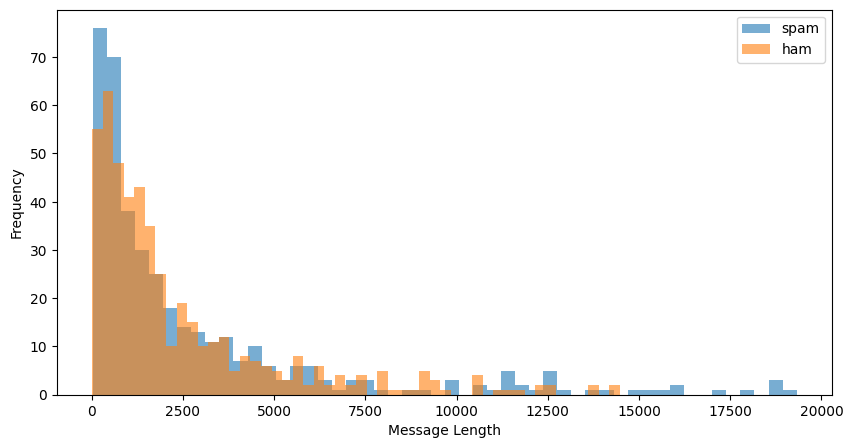

In [8]:
#add a column for message length
email_df['Message_Length'] = email_df['Message'].apply(len)
email_df['Subject_Length'] = email_df['Subject'].apply(len)

#plot histograms for message lengths of spam and ham emails
plt.figure(figsize=(10, 5))
email_df[email_df['Label'] == 'spam']['Message_Length'].plot(kind='hist', bins=50, alpha=0.6, label='spam')
email_df[email_df['Label'] == 'ham']['Message_Length'].plot(kind='hist', bins=50, alpha=0.6, label='ham')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In the above, I can see that spam emails are typicaly shorter in length than ham emails or are significantly longer in length than ham emails. 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

spam_text = email_df[email_df['Label'] == 'spam']['Message']

#combine all the spam messages into a single string
all_spam_text = ' '.join(spam_text.values)

#use countvectorizer to count word frequencies 
vectorizer = CountVectorizer(stop_words='english')
word_count_matrix = vectorizer.fit_transform([all_spam_text])

#get the word frequencies
word_counts = word_count_matrix.toarray().sum(axis=0)
word_list = vectorizer.get_feature_names_out()

#create a dataframe with words and their counts
word_freq_df = pd.DataFrame({'Word': word_list, 'Count': word_counts})

#sort the dataframe by count in descending order
word_freq_df = word_freq_df.sort_values(by='Count', ascending=False)

#display the top 20 most common words
print(word_freq_df.head(20))


             Word  Count
5741         mail   1605
291            20   1490
6527        order   1305
7480       report   1263
1461      address   1045
7891         send    944
3676        email    943
7073      program    931
6079        money    836
4241         free    808
5600         list    801
7327      receive    796
2316     business    705
9451         work    636
638            3d    587
2733          com    572
5098     internet    569
3146          day    560
4810         http    513
5008  information    495


In the above, I can see the top 20 most common spam words in the spam emails. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

ham_text = email_df[email_df['Label'] == 'ham']['Message']

#combine all the ham messages into a single string
all_ham_text = ' '.join(ham_text.values)

#use countvectorizer to count word frequencies 
vectorizer = CountVectorizer(stop_words='english')
word_count_matrix = vectorizer.fit_transform([all_ham_text])

#get the word frequencies
word_counts = word_count_matrix.toarray().sum(axis=0)
word_list = vectorizer.get_feature_names_out()

#create a dataframe with words and their respective counts
word_freq_df = pd.DataFrame({'Word': word_list, 'Count': word_counts})

#sort the dataframe by count in descending order
word_freq_df = word_freq_df.sort_values(by='Count', ascending=False)

#display the top 20 most common words
print(word_freq_df.head(20))


              Word  Count
10663     language   1553
18331   university   1139
11034   linguistic    660
4828    conference    543
6365           edu    457
9398   information    450
693             30    416
6630       english    414
82              10    360
13447        paper    343
11407         mail    340
1838       address    332
13449       papers    310
15126     research    303
426           1998    300
9267       include    300
7484          form    292
7213           fax    285
7444        follow    280
19221         word    266


In the above, I can see the top 20 most common words in the ham emails.

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [11]:
#pip install nltk

In [12]:
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
import joblib

#download stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#function for text cleaning, tokenization, stopword removal, and stemming
def preprocess(text):
    #lowercase all text
    text = text.lower()
    #remove punctuation, numbers, and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    #tokenize 
    words = text.split()
    #remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(processed_words)
    

#apply preprocessing to all messages
email_df['Processed_Message'] = email_df['Message'].apply(preprocess)

#apply preprocessing to all subjects
email_df['Processed_Subject'] = email_df['Subject'].apply(preprocess)

#encode labels
label_encoder = LabelEncoder()
email_df['Encoded_Label'] = label_encoder.fit_transform(email_df['Label'])

#create feature and target variables
X = email_df['Processed_Message']
y = email_df['Encoded_Label']

#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create a mask for the training set
train_mask = email_df.index.isin(X_train.index)

#separate spam and ham emails in the training set
spam_emails = email_df[train_mask & (email_df['Label'] == 'spam')]
ham_emails = email_df[train_mask & (email_df['Label'] == 'ham')]

#get all words in spam and ham emails from training data
spam_words = ' '.join(spam_emails['Processed_Message']).split()
ham_words = ' '.join(ham_emails['Processed_Message']).split()

#count the occurrences of each word in spam and ham
spam_word_count = Counter(spam_words)
ham_word_count = Counter(ham_words)

#find common words between spam and ham (only based on training data)
common_words = set(spam_word_count.keys()) & set(ham_word_count.keys())

#function to remove common words
def remove_common_words(text, common_words):
    words = text.split()
    filtered_words = [word for word in words if word not in common_words]
    return ' '.join(filtered_words) 

#I applied the common word removal only on the training set first
X_train_final = X_train.apply(lambda x: remove_common_words(x, common_words))

#Now, for the test set, I identified the common words based on training set and applied them
X_test_final = X_test.apply(lambda x: remove_common_words(x, common_words))

#define a threshold for rare words using the training set
word_count = Counter(' '.join(X_train_final).split())
rare_words = {word for word, count in word_count.items() if count < 5}

#function to remove rare words
def remove_rare_words(text, rare_words):
    words = text.split()
    filtered_words = [word for word in words if word not in rare_words]
    return ' '.join(filtered_words)

#apply rare word removal
X_train_final = X_train_final.apply(lambda x: remove_rare_words(x, rare_words))
X_test_final = X_test_final.apply(lambda x: remove_rare_words(x, rare_words))

#create a countvectorizer to convert text to numerical data
vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train_final).toarray()
X_test_vectorized = vectorizer.transform(X_test_final).toarray()


joblib.dump(common_words, 'common_words.pkl')
joblib.dump(rare_words, 'rare_words.pkl')


joblib.dump(vectorizer, 'spam_ham_vectorizer.pkl')

print(email_df[['Processed_Subject', 'Processed_Message', 'Encoded_Label']].head())





[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     emily/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                       Processed_Subject  \
0    subject wkshp earli e ural interact   
1   subject job announc academium sinica   
2  subject knowledg languag bibliographi   
3                   subject servic updat   
4                    subject job announc   

                                   Processed_Message  Encoded_Label  
0  organ combin colloquium work seminar plan plac...              0  
1  job announc institut histori philolog academia...              0  
2  associ languag awar knowledg languag languag a...              0  
3  due signific rapid polici chang recent impleme...              1  
4  job announc depart foreign languag literatur n...              0  


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [20]:
import tensorflow as tf
from sklearn.metrics import f1_score, accuracy_score
#define the neural network model
def create_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),  
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#create the model
model = create_model(X_train_vectorized.shape[1])

#train the model
model.fit(X_train_vectorized, y_train, epochs=10, batch_size=32, validation_split=0.2)

#make predictions on the test set
y_pred_prob = model.predict(X_test_vectorized)
y_pred = (y_pred_prob > 0.5).astype(int)  

#calculate the F1 score
f1 = f1_score(y_test, y_pred)

#calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5592 - loss: 0.6437 - val_accuracy: 0.8500 - val_loss: 0.5057
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8160 - loss: 0.4840 - val_accuracy: 0.9571 - val_loss: 0.3866
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9521 - loss: 0.3733 - val_accuracy: 0.9643 - val_loss: 0.2970
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9709 - loss: 0.3126 - val_accuracy: 0.9714 - val_loss: 0.2264
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9681 - loss: 0.2271 - val_accuracy: 0.9714 - val_loss: 0.1757
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9668 - loss: 0.1684 - val_accuracy: 0.9714 - val_loss: 0.1393
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9783 - loss: 0.1322 - val_accuracy: 0.9786 - val_loss: 0.1131
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9800 - loss: 0.0978 - val_accuracy: 0.9857 - val

1. Define the neutral network and create the model.
2. Use the fit method to train the neural network using the training set.
3. Use the predict method to generate predictions on the test set.
4. Calculate the F1 score and the accuracy score to assess the model's performance.
For this simple binary classification neutral network model, I can see that the accuracy score and the F1 score are pretty good. However, I will try oter models to see if I can achieve even better results.

These are the results for the neural network model before hyperparameter tuning: 
F1 Score: 0.9333
Accuracy Score: 0.9371

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

#create and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_vectorized, y_train)

#make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_vectorized)

#calculate the F1 score and accuracy
f1_log_reg = f1_score(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"F1 Score: {f1_log_reg:.4f}")
print(f"Accuracy Score: {accuracy_log_reg:.4f}")


F1 Score: 0.9186
Accuracy Score: 0.9200


In the above I used the Logistic Regression model. Again, I trained the model using the fit method and I generated predictions on the test set using the predict method. I can see that Logistic Regression performed slightly worse than the neural network model. However, the accuracy score and the F1 score are still pretty high.

These are the results for the Logistic Regression model before hyperparameter tuning:
F1 Score: 0.9186
Accuracy Score: 0.9200


In [15]:
from sklearn.naive_bayes import MultinomialNB

#create and train the Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

#make predictions on the test set
y_pred_naive_bayes = naive_bayes_model.predict(X_test_vectorized)

#calculate the F1 score and accuracy
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

print(f"F1 Score: {f1_naive_bayes:.4f}")
print(f"Accuracy Score: {accuracy_naive_bayes:.4f}")


F1 Score: 0.9007
Accuracy Score: 0.9143


In the above I used the Naive Bayes model. Again, I trained the model using the fit method and I generated predictions on the test set using the predict method. I can see that Naive Bayes performed slightly worse than the neural network model and Logistic Regression. However, the accuracy score and the F1 score are still pretty high. 

These are the results for the Naive Bayes model before hyperparameter tuning:
F1 Score: 0.9007
Accuracy Score: 0.9143

Ultimately, I will be using the neural network model since it performed the best. 

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [16]:
#!pip install keras-tuner


In [17]:
import tensorflow as tf
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, accuracy_score
import warnings

warnings.filterwarnings("ignore", message="Skipping variable loading for optimizer")
input_dim = X_train_vectorized.shape[1]

def create_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

#early stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,              
    restore_best_weights=True
)

#initialize the RandomSearch
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=5,  
    executions_per_trial=1, 
    directory='random_search_tuning',  
    project_name='email_spam_classifier'
)

#find the best hyperparameters
tuner.search(X_train_vectorized, y_train, 
             epochs=10,
             batch_size=32,  
             validation_split=0.2,
             callbacks=[early_stopping])

#get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save('spam_ham_classifier.keras', include_optimizer=False)
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

#best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters.values}")

y_pred_prob = best_model.predict(X_test_vectorized) 
y_pred = (y_pred_prob > 0.5).astype(int)

#F1
f1 = f1_score(y_test, y_pred)

#accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")




Reloading Tuner from random_search_tuning/email_spam_classifier/tuner0.json
Best Hyperparameters: {'units': 128, 'dropout_rate': 0.2, 'optimizer': 'adam'}
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
F1 Score: 0.9427
Accuracy Score: 0.9486


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


The client has tasked to me to find out whether an email is spam or ham. 

First, I explored the data and looked for patterns and correlations using word clouds and bar graphs comparing the spam and ham distributions. 

-I realized that the words "free", "link", "offer", "sell", "want" are very common in spam emails. 
-I realized that the words  "linguistic", "language", "one", "conference", "paper", "subject"  are very common in ham emails. 
-I realized that spam emails are typicaly shorter in length than ham emails or are significantly longer in length than ham emails.
-I also realizes that there were some words that existed in both the spam emails. 

Next, I applied some data transformations using a data pipeline: 
-Removed stopwords. 
-Made all the text lower case. 
-Removed any punctuation, numbers, and special characters.
-Tokinized the email messages.
-Applied stemming. 
-Removed common words between the spam and ham emails. 
-Removed rare words from the emails that occurred less than 5 times. 

Note: There may be potential bias when removing punctuation, numbers, and special characters. 

Then I tested 3 different models: 
-Binary Classification neural network
-Logistic Regression
-Naive Bayes

The neural network model performed the best out of all the models with an Accuracy Score of 93.71% and an F1 score of 0.9333 before hyperparameter tuning. 


Then, I tuned my model with Randomized Search over 5, 10, 15, 20, 100, 200 iterations and I got improved results!

The final results are: 

-Accuracy Score: 94.29%

-F1 Score: 0.9367

Overall, these results are are pretty good. 

Several factors contributing to the good results:
-The dataset is very balanced between spam and ham messages which helped the model learn to classify both classes accurately. 
-A dataset that includes a wide variety of spam and ham messages which ensured that the model generalized well. 
-The data transformations of tokenization, stopword removal, stemming, removed punctuation/numbers/special characters, removal common words between spam and ham, and removal of rare words all helped my model perform well. 
-Training set was sufficient enough to made good predictions. 
-Neural network model was very effective with processing text compared to other models. Thus, enhancing my results. 

Possible additional steps to improve the model:
-Handle miss spelled words from the emails. 
-Try different performance measures. 
-Try other kinds of hyperparameter tuning. 


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [18]:
def infrence(prams):
    results = m.run(prams)
    return results 

In [21]:
import joblib
import re
import numpy as np
import tensorflow as tf
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import os
import warnings

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow')

model = tf.keras.models.load_model('spam_ham_classifier.keras', compile=False)
vectorizer = joblib.load('spam_ham_vectorizer.pkl')

#download NLTK stopwords
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#load common and rare words
common_words = joblib.load('common_words.pkl')
rare_words = joblib.load('rare_words.pkl')

#preprocessing
def preprocess_inference(text, common_words, rare_words, stop_words, stemmer):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    filtered_words = [word for word in processed_words if word not in common_words and word not in rare_words]
    return ' '.join(filtered_words)

def inference(text):
    #preprocess the input text
    processed_text = preprocess_inference(text, common_words, rare_words, stop_words, stemmer)
    
    #transform text to numerical features
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    
    #predict with the loaded model
    prediction_prob = model.predict(vectorized_text)
    
    prediction = (prediction_prob > 0.5).astype(int)
    
    return 'spam' if prediction == 1 else 'ham'

input_text = "wednesday thursday evening university restaurant . pre-book . staying gent gent ( population around 230 , 0 ) historic flemish city , first europe declare itself independent feudal control . plethora medieval vista bridge thus entitle compete bruge amsterdam title ' venice north ' . busy industrial city commercial administrative centre east flander . first language flemish / dutch ( depend one 's sociolinguistic viewpoint ) nearly every-body both english french least degree fluency . numerous restaurant , cafe pub near conference area ( include two vegetarian restaurant ) , many stay open small hour . price cheap northern european standard . those wish combine conference visit gent surround area , train less hour bruge , brussel , antwerp belgian coast . even ardenn pari within few hour . registration / queries attend conference , fill registration form return , payment , 1st . confirmation registration detail arrangement send third circular those register , enquiry , contact jim o'driscoll stef slembrouck seminarie voor engelse taalkunde , universiteit gent , rozier 44 ,"
result = inference(input_text)
print(f"Predicted Email Category: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted Email Category: ham
